In [1]:
import os
import sys
import json

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from src.utils import within_subject_functional_normalization

In [3]:
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.config import AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES
from src.plots.misc import plot_hist
from src.svm.pipeline import svm_pipeline

In [5]:
df = pd.read_csv("../data/master_functionals_new_features.csv")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.85800,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0
3335,3335,0,33.463300,0.230548,24.733616,36.905180,38.047897,13.314281,255.713210,0.00000,...,1,100.0,1.0,1,0.00,0.000000,0.0,0.0,0.0,0.0


In [6]:
participant_ids = df["participant"].values
participant_ids

array([36, 21, 34, ..., 29, 37, 23])

In [7]:
df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.259983,0.332261,0.866330,0.506420,0.320359,-0.790661,0.054842,0.289241,...,0,20.0,1.0,2,0.064130,-0.079352,0.217061,0.942293,-0.490511,-0.429669
1,1,0,-0.717108,0.725696,-1.882271,-0.319202,-0.012434,1.862051,-0.836629,-0.675393,...,1,80.0,1.0,2,-0.091515,0.026350,0.220541,0.992432,-0.538028,-0.408248
2,2,0,-0.566677,-0.205434,-0.120069,-0.761264,-0.667896,-0.572266,0.024613,0.186602,...,1,60.0,1.0,2,5.475477,1.376780,6.037742,2.412091,-0.237356,0.000000
3,3,0,0.919177,-0.523623,1.150908,1.216159,0.367601,-0.741268,-0.271717,-0.377001,...,1,100.0,2.0,2,-0.756171,-0.630867,-0.715078,-0.456357,-0.313993,-0.232495
4,4,0,0.388853,-0.532196,0.628008,-0.127185,-0.194455,-0.701555,-0.916483,-0.569107,...,1,80.0,1.0,2,-0.393502,-0.349288,-0.095453,-0.621455,-0.502331,-0.443203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,-0.450267,1.362586,-1.129102,-0.455241,0.339407,1.720947,0.798251,0.744770,...,1,80.0,1.0,2,0.455788,0.122313,1.659524,0.928705,-0.500835,-0.429669
3333,3333,0,-0.211937,-0.124017,0.559091,0.318900,-0.378290,-0.804033,0.598907,0.307612,...,1,80.0,2.0,2,-0.221153,-0.200000,-0.715078,-0.456357,-0.313993,-0.232495
3334,3334,0,0.043278,-0.212633,0.459059,0.032353,-0.061197,-0.793500,0.414662,1.239616,...,1,100.0,1.0,1,0.528203,-0.246869,-0.653204,-0.551487,-0.313050,0.000000
3335,3335,0,-1.120744,1.811996,-2.040631,0.103935,0.535386,2.230362,0.452582,-0.727131,...,1,100.0,1.0,1,-0.614963,-0.673075,-0.428496,-0.256495,-0.111803,0.000000


In [8]:
y = df["accuracy"].values
x = df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values

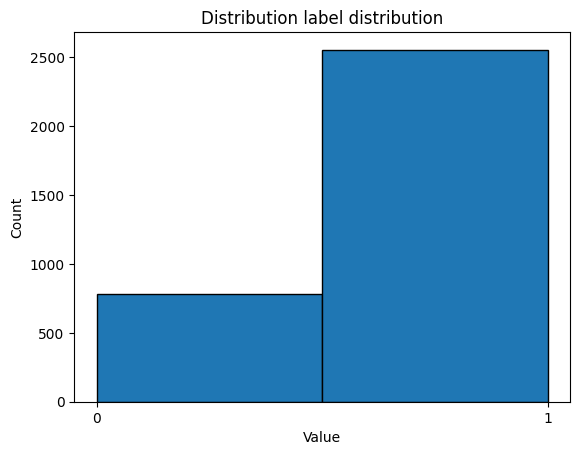

In [9]:
plot_hist(y, "label distribution")

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.6225656763814809
std (train): 0.005349446285686072
avg (validation): 0.6035376024562569
std (validation): 0.015843288359546657

printing roc_auc measures
avg (train): 0.6773730206386025
std (train): 0.004955236733170982
avg (validation): 0.6385931681673764
std (validation): 0.0158209052270644

printing f1_macro measures
avg (train): 0.58072968334106
std (train): 0.003799696474680067
avg (validation): 0.5589859077201444
std (validation): 0.015025310184040385


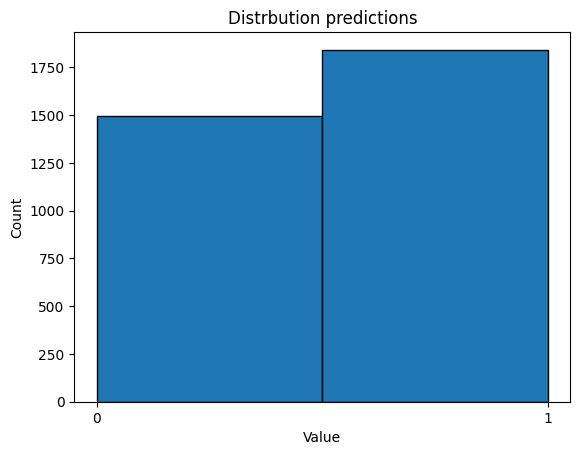

              precision    recall  f1-score   support

           0       0.32      0.61      0.42       782
           1       0.83      0.60      0.70      2555

    accuracy                           0.60      3337
   macro avg       0.58      0.61      0.56      3337
weighted avg       0.71      0.60      0.63      3337


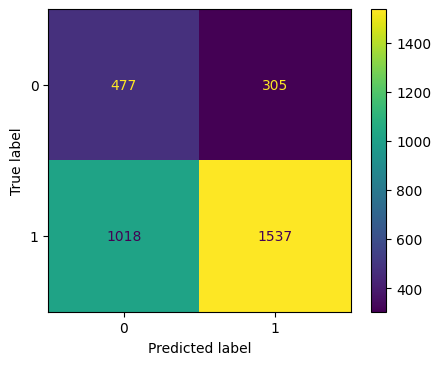

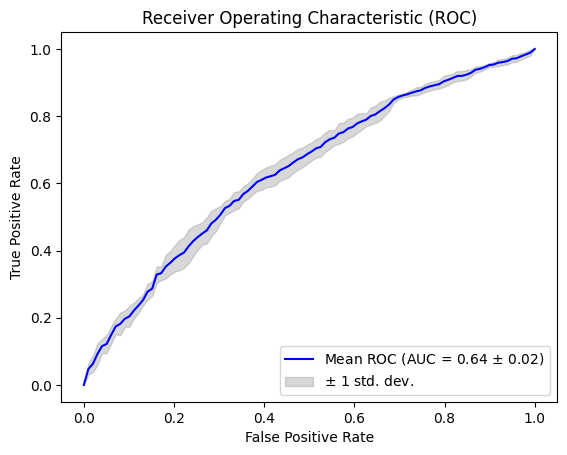

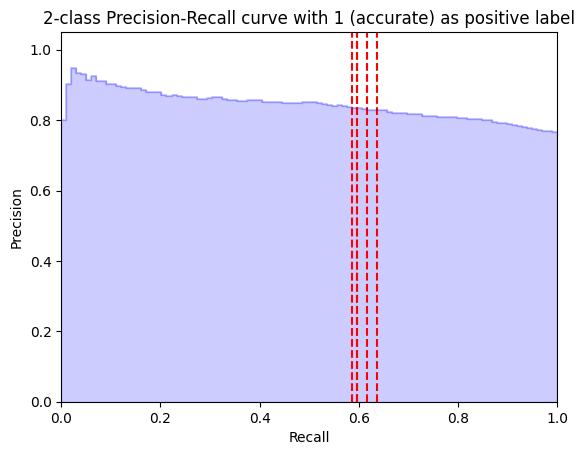

In [10]:
svm_pipeline(x, y, "roc_auc")

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.7913547275347554
std (train): 0.005450261466139575
avg (validation): 0.6412890859959243
std (validation): 0.017279255420961117

printing roc_auc measures
avg (train): 0.9007856393840304
std (train): 0.004551547750061811
avg (validation): 0.6334687983104351
std (validation): 0.015287093439060612

printing f1_macro measures
avg (train): 0.7532587213746554
std (train): 0.005228101166377254
avg (validation): 0.5713991618528904
std (validation): 0.01305284031633575


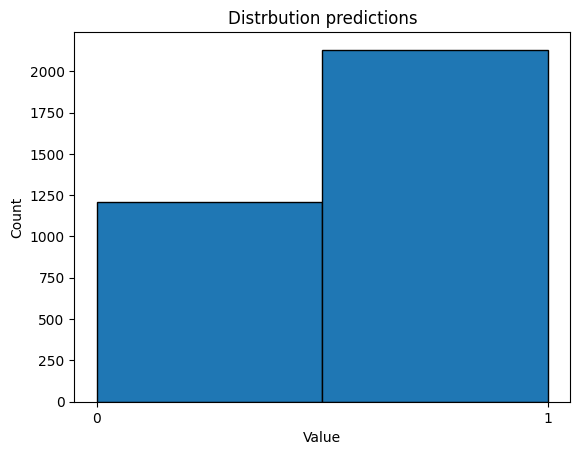

              precision    recall  f1-score   support

           0       0.33      0.51      0.40       782
           1       0.82      0.68      0.74      2555

    accuracy                           0.64      3337
   macro avg       0.57      0.59      0.57      3337
weighted avg       0.70      0.64      0.66      3337


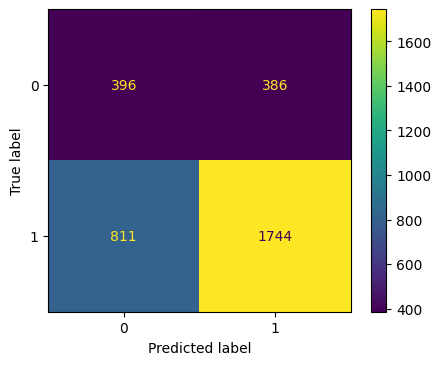

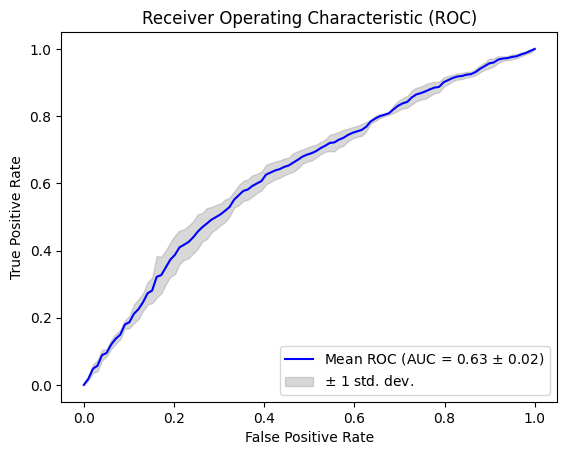

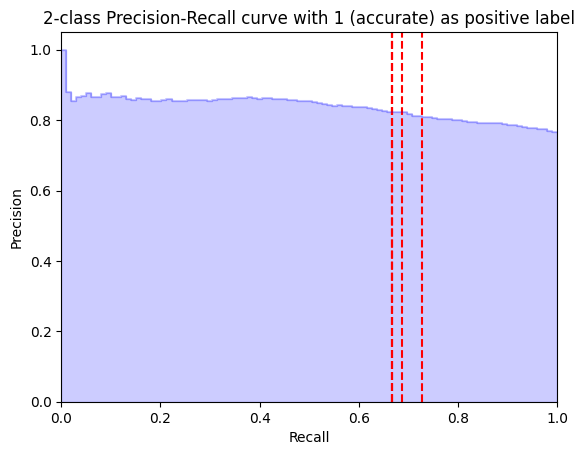

In [11]:
svm_pipeline(x, y, "f1_macro")